In [44]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import constrainedzoom as cz
import constrainedzoom.plots as cp
import functools
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

# Creating Density Field

In [46]:
HIGH = 64
LOW = 32
SCALE = 2
OFFSET = 5

#Reference Implementation
ref = cz.methods.filtered.FilteredZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

#Constraints are applied directly to independent noise vectors.
#Low resolution noise in center window is convolved with high resolution noise in new window.
trad = cz.methods.traditional.TraditionalZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

#Works in Delta Z Basis instead of Noise Z basis.
delta = cz.methods.filtered.FilteredZoomConstrainedInDeltaBasis(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

#Hybrid approach (hybrid trad+filter)
hybrid = cz.methods.filtered.HybridZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

#Idealized approach
ideal = cz.methods.idealized.IdealizedZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

#Idealized Fast
#ideal_fast = cz.methods.idealized.IdealizedFastZoomConstrained(nP=HIGH, nW=LOW, hires_window_scale=SCALE, offset=OFFSET)

AttributeError: module 'constrainedzoom.methods.idealized' has no attribute 'IdealizedFastZoomConstrained'

In [47]:
#Generating Gaussian random field with constraints if specified.
ref_high, ref_low = ref.realization()

trad_high, trad_low = trad.realization()

delta_high, delta_low = delta.realization()

hybrid_high, hybrid_low = hybrid.realization()

ideal_high, ideal_low = ideal.realization()

# high_pixel = np.arange(SCALE*OFFSET, LOW+OFFSET*SCALE)
# low_pixel = np.arange(0, SCALE*HIGH, SCALE)

AttributeError: 'FFTArray' object has no attribute 'realization'

AttributeError: 'FFTArray' object has no attribute 'xs'

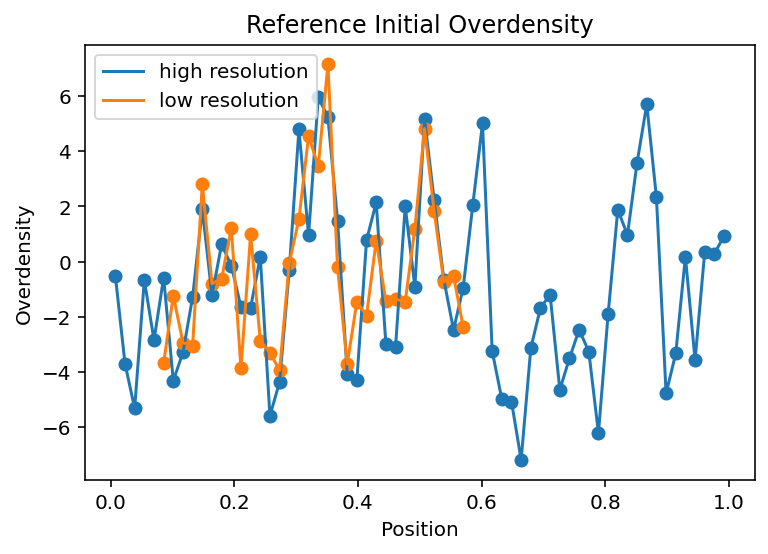

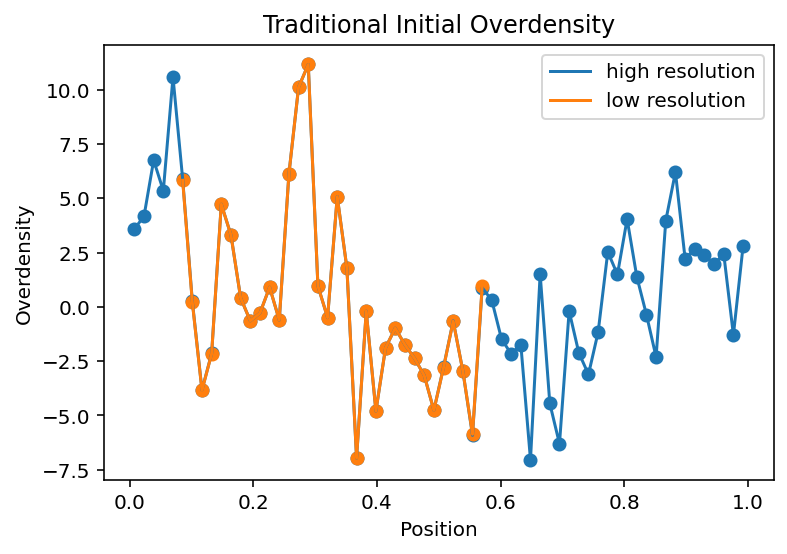

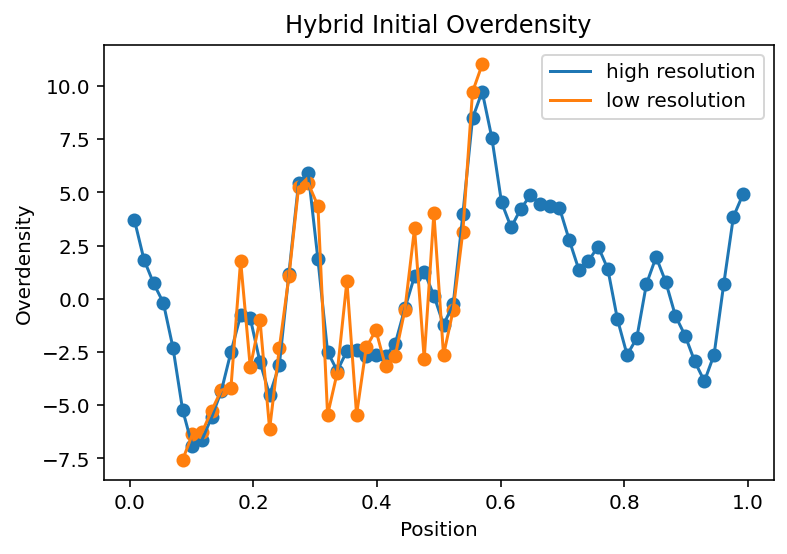

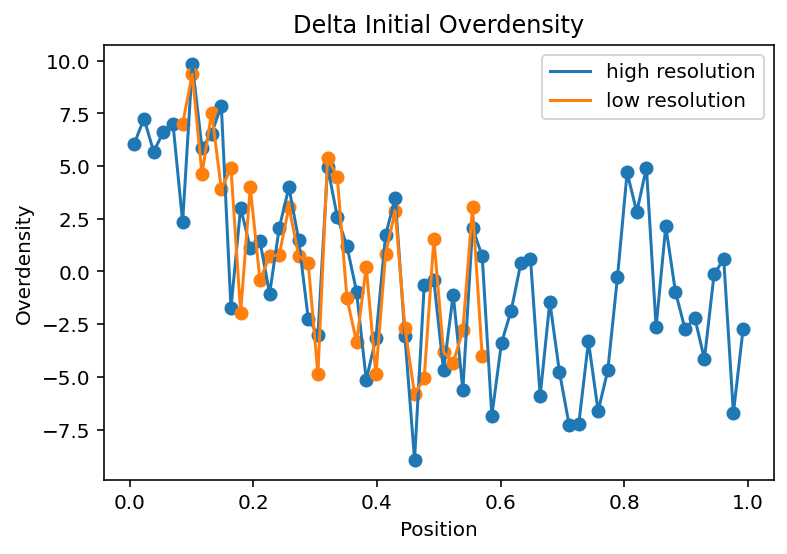

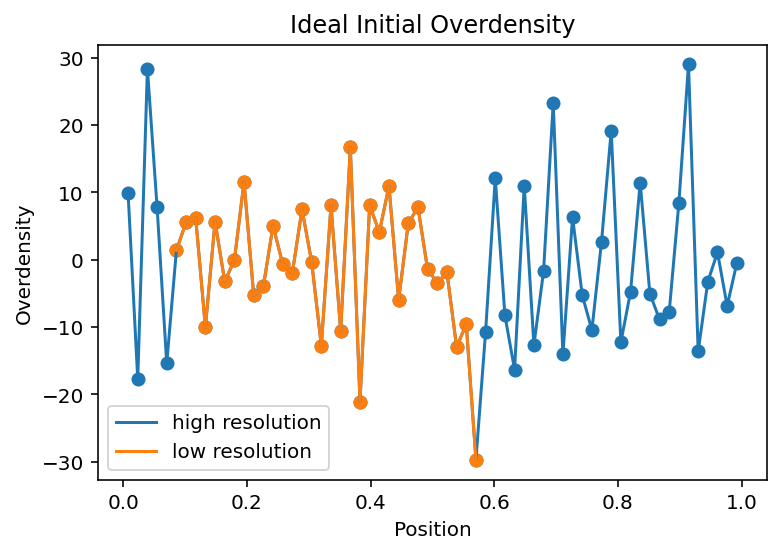

In [48]:
pos = ref.xs()
plt.figure(1)
plt.plot(pos[0], ref_high, label='high resolution')
plt.plot(pos[1], ref_low, label='low resolution')
plt.scatter(pos[0], ref_high)
plt.scatter(pos[1], ref_low)
plt.legend()
plt.title("Reference Initial Overdensity")
plt.xlabel("Position")
plt.ylabel("Overdensity")
plt.savefig("ref_positionIC.png")

pos = trad.xs()
plt.figure(2)
plt.plot(pos[0], trad_high, label='high resolution')
plt.plot(pos[1], trad_low, label='low resolution')
plt.scatter(pos[0], trad_high)
plt.scatter(pos[1], trad_low)
plt.legend()
plt.title("Traditional Initial Overdensity")
plt.xlabel("Position")
plt.ylabel("Overdensity")
plt.savefig("trad_positionIC.png")

pos = hybrid.xs()
plt.figure(3)
plt.plot(pos[0], hybrid_high, label='high resolution')
plt.plot(pos[1], hybrid_low, label='low resolution')
plt.scatter(pos[0], hybrid_high)
plt.scatter(pos[1], hybrid_low)
plt.legend()
plt.title("Hybrid Initial Overdensity")
plt.xlabel("Position")
plt.ylabel("Overdensity")
plt.savefig("hybrid_positionIC.png")

pos = delta.xs()
plt.figure(4)
plt.plot(pos[0], delta_high, label='high resolution')
plt.plot(pos[1], delta_low, label='low resolution')
plt.scatter(pos[0], delta_high)
plt.scatter(pos[1], delta_low)
plt.legend()
plt.title("Delta Initial Overdensity")
plt.xlabel("Position")
plt.ylabel("Overdensity")
plt.savefig("delta_positionIC.png")

pos = ideal.xs()
plt.figure(5)
plt.plot(pos[0], ideal_high, label='high resolution')
plt.plot(pos[1], ideal_low, label='low resolution')
plt.scatter(pos[0], ideal_high)
plt.scatter(pos[1], ideal_low)
plt.legend()
plt.title("Ideal Initial Overdensity")
plt.xlabel("Position")
plt.ylabel("Overdensity")
plt.savefig("ideal_positionIC.png")


In [ ]:
# plotting as a single field (the low-res parts are ignored in zoomed window)
# low_pixelmasked = np.ma.masked_inside(low_pixel, SCALE*OFFSET, LOW+OFFSET*SCALE)
# lowmasked = np.ma.fix_invalid(low, mask=low_pixelmasked.mask)

In [ ]:
# #TODO: make it into one array
# plt.plot(low_pixelmasked, lowmasked, label = 'low resolution')
# plt.plot(high_pixel, high, label='high resolution')

In [ ]:
# same plot in Fourier space
klow, khi =test._get_ks()
lowfs = low.in_fourier_space()
hifs = high.in_fourier_space()
plt.plot(khi, hifs, label="high resolution")
plt.plot(klow, lowfs, label="low resolution")
plt.scatter(khi, hifs)
plt.scatter(klow, lowfs)

plt.legend()
plt.xlabel("wavenumber")
plt.ylabel("overdensity")
plt.savefig("wavenumberIC.png")
print(klow.shape)
print(khi.shape)
print(low.shape)
print(lowfs.shape)

In [ ]:
PLOT_OFFSET=65
hires = cz.methods.filtered.FilteredZoomConstrained(nP=HIGH*2, nW=LOW*2, hires_window_scale=SCALE, offset=OFFSET)
klow,khi = hires._get_ks()
xlow, xhi = hires.xs()
lowy = np.zeros((len(xlow),len(klow)))
hiy = np.zeros((len(xhi),len(khi)))

for i in range(len(khi)):
    hiy[:,i] = np.cos(khi[i]*xhi[:])+khi[i]

plt.plot(xhi,hiy)
plt.xlabel('position')
plt.ylabel('wavenumber')

In [ ]:
for i in range(len(klow)):
    lowy[:,i] = np.cos(klow[i]*xlow[:])+klow[i]
plt.plot(xlow, lowy, color='blue')
plt.xlabel('position')
plt.ylabel('wavenumber')

In [ ]:
plt.plot(xlow,lowy, color='black')
plt.plot(xhi,hiy, color='green')
plt.xlabel('position')
plt.ylabel('wavenumber')
plt.title("Visualization of Fourier Transform")
plt.savefig("fourier_visual.png")

# Plotting Power Spectrum

In [ ]:
cov = test.get_cov()
cp.cov_zoom_demo(nP=HIGH, nW=LOW, hires_window_scale=SCALE, hires_window_offset=OFFSET,plaw=0,
                 errors=True,plot_type='pspec')

In [ ]:
#plotting power spectrum for the low-res example
khi, klow=test._get_ks()
lowfs = low.in_fourier_space()
# plt.plot(klow, lowfs)
mycov = 1/(len(klow)-1)*np.outer(klow, klow)
power = mycov.diagonal()/2*(np.pi)**(-2)
power = np.multiply(power,(klow)**3)
plt.plot(klow,power)
print(klow.shape)
print(khi.shape)

In [ ]:
# trying the implementation used in plot_power_spec(...) from cp
cov = test.get_cov()
C11 = cov[:test.nP,:test.nP]
C12 = cov[:test.nP,test.nP:]
C22 = cov[test.nP:,test.nP:]
# why divide it up this way? This doesn't look like it separates into low/high res parts of the matrix...

# defining nyquist frequencies
k_nyq_1 = test.nP/2
k_nyq_2 = test.nW * G.nW